In [1]:
#Zbudowanie modelu przewidywania, czy klient byłby zainteresowany ubezpieczeniem pojazdu, jest niezwykle pomocne dla firmy, 
#ponieważ może wtedy odpowiednio zaplanować strategię komunikacji, aby dotrzeć do tych klientów i zoptymalizować 
#swój model biznesowy i przychody.
# Mamy informacje o danych demograficznych (płeć, wiek, typ kodu regionu), pojazdach (wiek pojazdu, uszkodzenia), 
#polisie (składka, kanał zaopatrzenia) itp.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#wczytanie zbiorów danych
df_train = pd.read_csv('ins_train.csv')

In [4]:
df_train.head(15)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
#Sprawdzam braki w danych
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

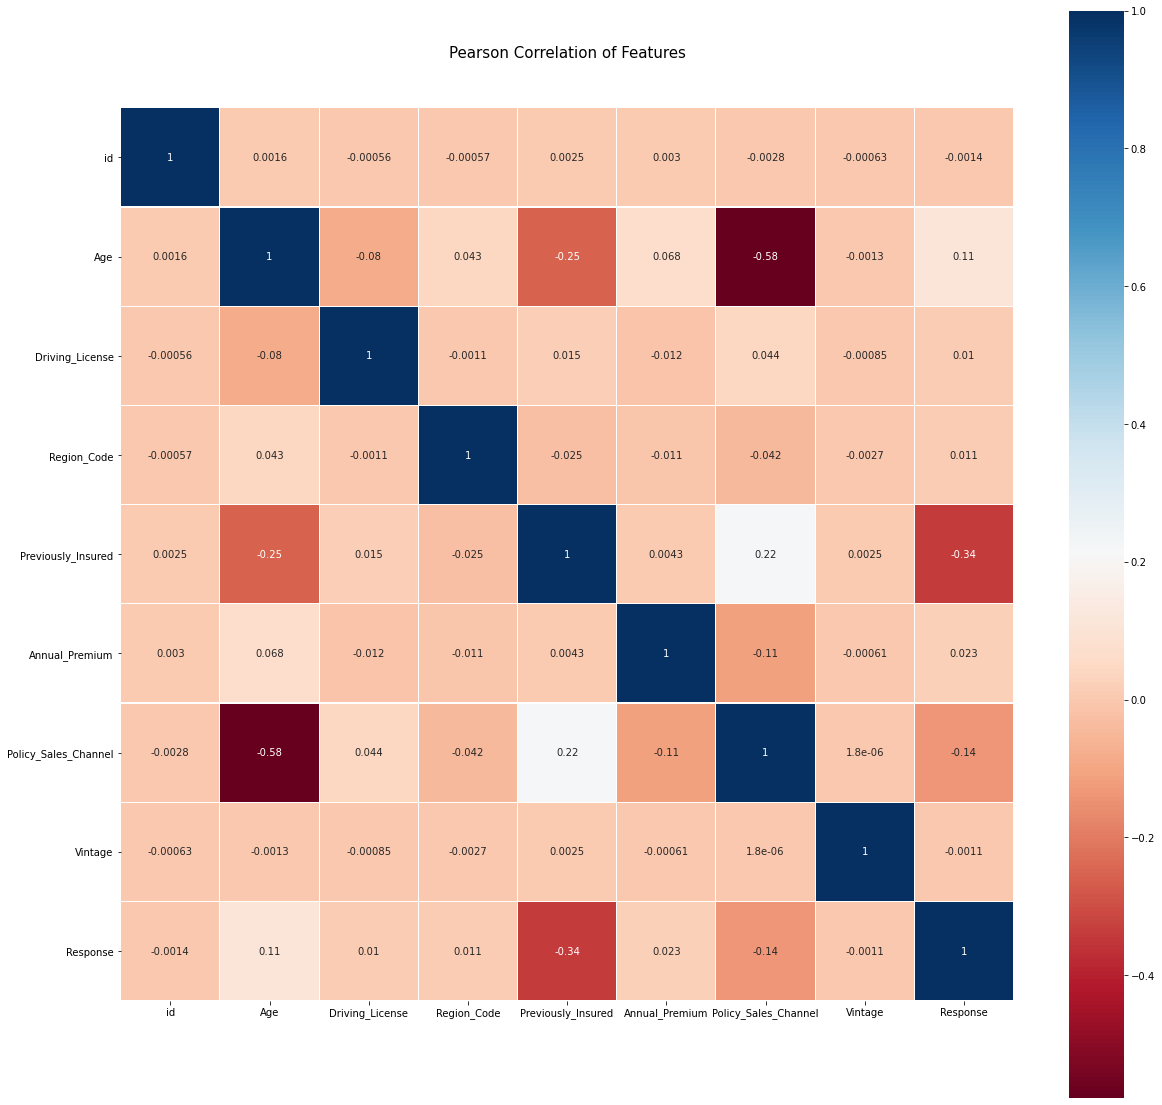

In [7]:
#Sprawdzam korelację
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('korelacja.png', bbox_inches='tight')

In [8]:
#usuwam nieskorelowane dane
data=df_train.drop(['Region_Code','Annual_Premium','id','Vintage'],axis=1)

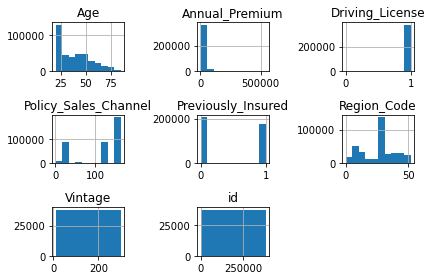

In [9]:
#Sprawdzam jak kształtuje się odpowiedź w zalezności od podanych danych
df_train.drop('Response', axis = 1).hist()
plt.tight_layout()
plt.show()

D:\Programy\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


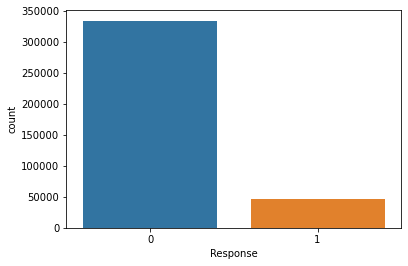

In [10]:
sns.countplot(df_train.Response)

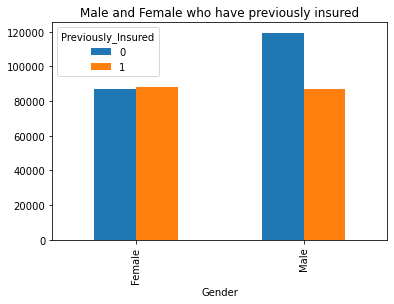

In [11]:
pd.crosstab(index=df_train['Gender'], columns=df_train['Previously_Insured']).plot(kind='bar')
plt.title('Male and Female who have previously insured')

plt.show()

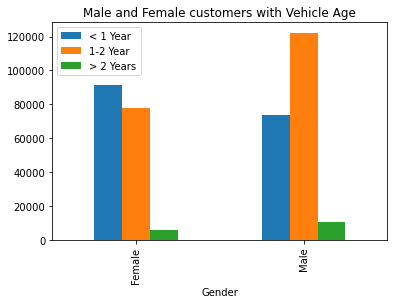

In [12]:
pd.crosstab(index=df_train['Gender'], columns=df_train['Vehicle_Age']).sort_values(by='Female', axis=1, ascending=False).plot(kind='bar')
plt.legend(loc=2)
plt.title('Male and Female customers with Vehicle Age')
plt.show()

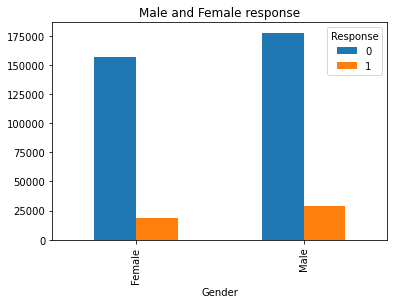

In [13]:
pd.crosstab(index=df_train['Gender'], columns=df_train['Response']).plot(kind='bar')
plt.title('Male and Female response')

plt.show()

In [14]:
data.head(10)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,Male,44,1,0,> 2 Years,Yes,26.0,1
1,Male,76,1,0,1-2 Year,No,26.0,0
2,Male,47,1,0,> 2 Years,Yes,26.0,1
3,Male,21,1,1,< 1 Year,No,152.0,0
4,Female,29,1,1,< 1 Year,No,152.0,0
5,Female,24,1,0,< 1 Year,Yes,160.0,0
6,Male,23,1,0,< 1 Year,Yes,152.0,0
7,Female,56,1,0,1-2 Year,Yes,26.0,1
8,Female,24,1,1,< 1 Year,No,152.0,0
9,Female,32,1,1,< 1 Year,No,152.0,0


In [15]:
#Zamieniam stringi na wartości numeryczne

In [16]:
gender_map={'Male':0,'Female':1}
data['Gender']=data['Gender'].map(gender_map)

In [17]:
vehicle_map={'> 2 Years':2,'1-2 Year':1,'< 1 Year':0}
data["Vehicle_Age"]=data["Vehicle_Age"].map(vehicle_map)

In [18]:
damage_map={'No':0,'Yes':1}
data['Vehicle_Damage']=data['Vehicle_Damage'].map(damage_map)

In [19]:
data.head(10)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,0,44,1,0,2,1,26.0,1
1,0,76,1,0,1,0,26.0,0
2,0,47,1,0,2,1,26.0,1
3,0,21,1,1,0,0,152.0,0
4,1,29,1,1,0,0,152.0,0
5,1,24,1,0,0,1,160.0,0
6,0,23,1,0,0,1,152.0,0
7,1,56,1,0,1,1,26.0,1
8,1,24,1,1,0,0,152.0,0
9,1,32,1,1,0,0,152.0,0


In [20]:
X=data.iloc[:,:-1]
Y=data['Response']

In [21]:
#Rozdzielam X i Y

In [22]:
#XGBoost

In [23]:
import shap
import xgboost as xgb

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,Y.values,test_size=0.25,random_state=50)

In [25]:
from xgboost.sklearn import XGBClassifier
booster = XGBClassifier(eta=0.1,min_child_weight=1,n_estimators=100)

booster.fit(X_train, y_train)

y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [26]:
#Sprawdzam jake czynniki mają wpływ na decyzję

In [27]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X)

In [28]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

Text(0.5, 0, 'Relative Feature Importance with XGBoost')

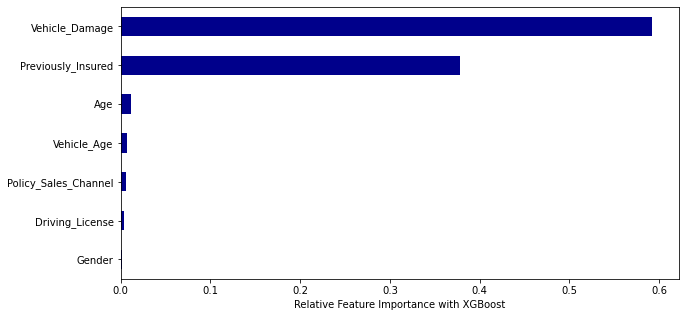

In [29]:
feat_importances = pd.Series(booster.feature_importances_, index=X.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkblue', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost')

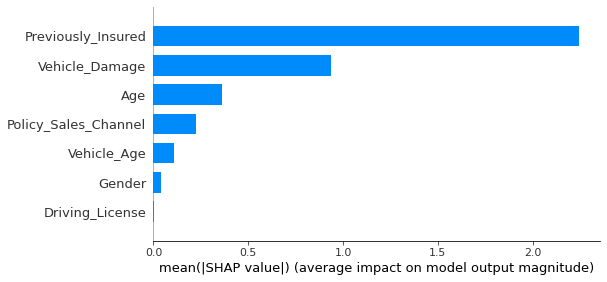

In [30]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [31]:
model=XGBClassifier(eta=0.1,min_child_weight=1,n_estimators=100)

In [32]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
from sklearn import metrics
print("Accuracy")
print( round(metrics.accuracy_score(y_test, model.predict(X_test))*100,0),'%')

Accuracy
88.0 %


In [34]:
from sklearn.metrics import auc, roc_curve

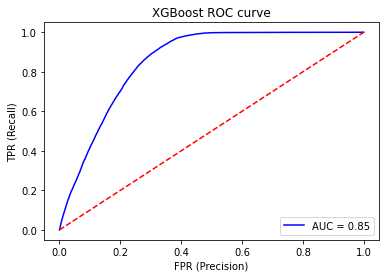

Area under curve (AUC):  0.8526257312343555


In [35]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [36]:
#k-najbliższych sąsiadów

In [37]:
#Sprawdzam jakie k byłoby odpowiednie dla najwyższego dopasowania

In [38]:
#k_loop = np.arange(1,35)
#k_scores = []
#from sklearn.model_selection import cross_val_score

In [39]:
#for k in k_loop:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #cross_val = cross_val_score(knn, X_train, y_train, cv=10 , scoring='accuracy')
    #k_scores.append(cross_val.mean())

In [40]:
#plt.style.use('fivethirtyeight')
#plt.plot(k_loop, k_scores)
#plt.show()

In [41]:
# Wybrałem 10

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train,y_train)
y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, y_train)

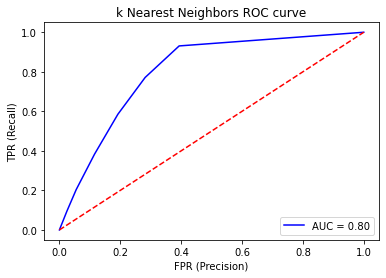

Area under curve (AUC):  0.8020140147211012


In [43]:
y_Knn_score = KNN_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_Knn_score)

plt.title('k Nearest Neighbors ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [44]:
#Wynik dopasowania
print(KNN_model_score)

0.8709377219405873


In [45]:
#Macierz konfuzji
print(metrics.confusion_matrix(y_train, y_train_predict))

[[245256   5596]
 [ 31294   3685]]


In [46]:
#Parametry
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    250852
           1       0.40      0.11      0.17     34979

    accuracy                           0.87    285831
   macro avg       0.64      0.54      0.55    285831
weighted avg       0.83      0.87      0.84    285831



In [47]:
#Drzewo decyzyjne

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

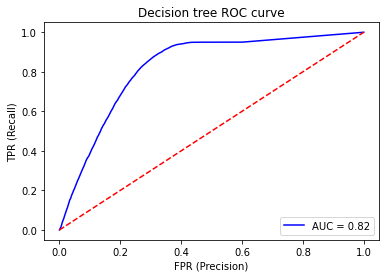

Area under curve (AUC):  0.8238167788731643


In [50]:
y_score = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Decision tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [51]:
#Regresja logistyczna

In [52]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
GLM = LogisticRegression(solver='liblinear', random_state=0)
GLM_fit = GLM.fit(X_train, y_train)

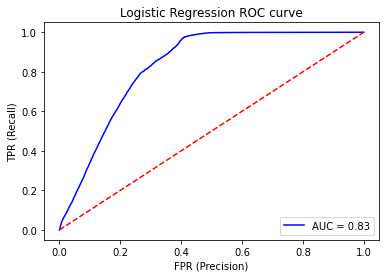

Area under curve (AUC):  0.8294442690064487


In [53]:
y_scoreGLM = GLM.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scoreGLM)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [54]:
#SGDC - stochastyczny spadek gradientu

In [55]:
from sklearn.linear_model import SGDClassifier

In [56]:
from sklearn.calibration import CalibratedClassifierCV

In [57]:
lr = SGDClassifier(loss='hinge',class_weight='balanced')
clf =lr.fit(X_train, y_train)
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model_SGDC=calibrator.fit(X_train, y_train)

y_train_pred = model_SGDC.predict_proba(X_train)
y_test_pred = model_SGDC.predict_proba(X_test)

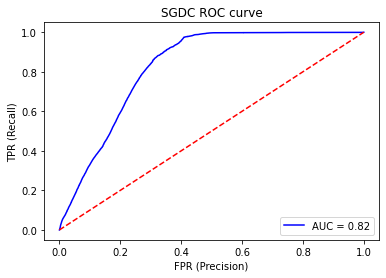

Area under curve (AUC):  0.8242933535429905


In [58]:
y_sgd = model_SGDC.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_sgd)

plt.title('SGDC ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [59]:
#SMOTE

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


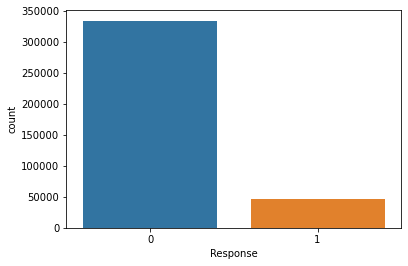

In [60]:
sns.countplot("Response", data=df_train)

In [61]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [62]:
#Po Zastosowaniu nadmiarowego próbkowania SMOTE

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


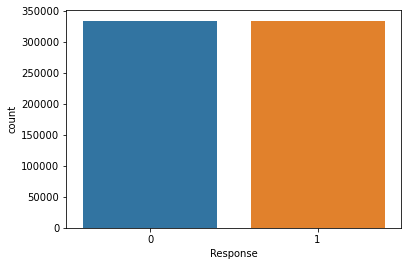

In [63]:
sns.countplot(Y)

In [64]:
#XGBOOST i SMOTE

In [65]:
XS_train, XS_test, yS_train, yS_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [66]:
model.fit(XS_train,yS_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
from sklearn import metrics
print("Accuracy")
print( round(metrics.accuracy_score(yS_test, model.predict(XS_test))*100,0),'%')

Accuracy
81.0 %


In [68]:
from sklearn.metrics import auc, roc_curve

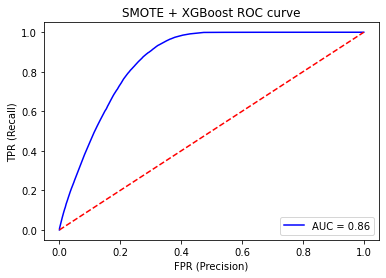

Area under curve (AUC):  0.8621444150609314


In [69]:
yXG_score = model.predict_proba(XS_test)[:,1]
fpr, tpr, _ = roc_curve(yS_test, yXG_score)

plt.title('SMOTE + XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [70]:
#k-najbliższych sąsiadów + SMOTE

In [71]:
KNN_model=KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(XS_train,yS_train)
yS_train_predict = KNN_model.predict(XS_train)
KNN_model_score = KNN_model.score(XS_train, yS_train)

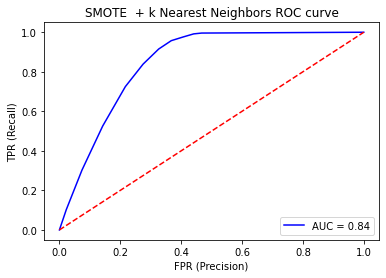

Area under curve (AUC):  0.8449268599794624


In [72]:
yS_Knn_score = KNN_model.predict_proba(XS_test)[:,1]
fpr, tpr, _ = roc_curve(yS_test, yS_Knn_score)

plt.title('SMOTE  + k Nearest Neighbors ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [73]:
#Wynik dopasowania
print(KNN_model_score)

0.7859696939921992


In [74]:
#Macierz konfuzji
print(metrics.confusion_matrix(yS_train, yS_train_predict))

[[170774  63489]
 [ 36711 197184]]


In [75]:
#Parametry
print(metrics.classification_report(yS_train, yS_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77    234263
           1       0.76      0.84      0.80    233895

    accuracy                           0.79    468158
   macro avg       0.79      0.79      0.79    468158
weighted avg       0.79      0.79      0.79    468158



In [76]:
#Drzewo decyzyjne +SMOTE

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier()
dt.fit(XS_train, yS_train)
dt_predict = dt.predict(XS_test)

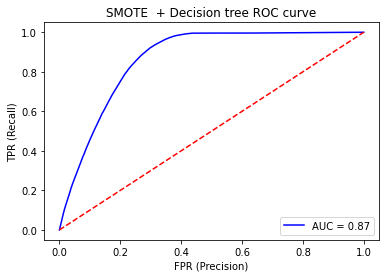

Area under curve (AUC):  0.8654773411885064


In [79]:
yST_score = dt.predict_proba(XS_test)[:,1]
fpr, tpr, _ = roc_curve(yS_test, yST_score)

plt.title('SMOTE  + Decision tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [80]:
#Regresja logistyczna + SMOTE

In [81]:
GLM = LogisticRegression(solver='liblinear', random_state=0)
GLM_fit = GLM.fit(XS_train, yS_train)

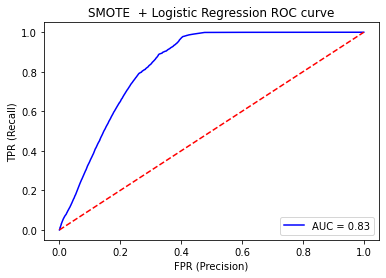

Area under curve (AUC):  0.8336418975903985


In [82]:
yS_scoreGLM = GLM.predict_proba(XS_test)[:,1]
fpr, tpr, _ = roc_curve(yS_test, yS_scoreGLM)

plt.title('SMOTE  + Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)

In [83]:
#SGDC - stochastyczny spadek gradientu + SMOTE

In [92]:
sgdc = SGDClassifier(loss='hinge',class_weight='balanced')
clf =sgdc.fit(XS_train, yS_train)
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model_SGDC=calibrator.fit(XS_train, yS_train)

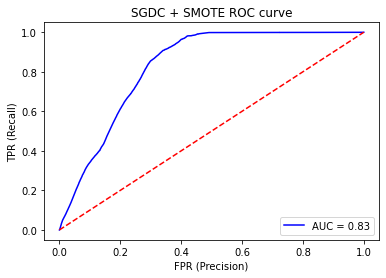

Area under curve (AUC):  0.8269947343971508


In [93]:
y_sgdS = model_SGDC.predict_proba(XS_test)[:,1]
fpr, tpr, _ = roc_curve(yS_test, y_sgdS)

plt.title('SGDC + SMOTE ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed',color='red')
plt.show()
print ('Area under curve (AUC): ', roc_auc)